<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/Analise_de_Dados_Indicadores_bolsa_PUB_junho_2021_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Junho/2021) - parte 2 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. 

Buscarei indicadores em que possamos comparar institutos chaves de analise da USP, desenvolvendo uma lógica para medir a intensidade de uso do E-Disciplina pelos clicks totais dos ambientes em todos recursos disponiveis para cada instituto.<br> <br> Na [parte um](https://colab.research.google.com/drive/1SsGKdqKwfN5brgigyqJK8uv-8BThSfOc?usp=sharing) deste estudo, fiz uma média em relação ao número de matrículado de cada instituto, o que foi impreciso pelo fato de que muitos ambientes de um instituto é oferecimento para outro instituto, logo, falha ao medir a intensidade de uso. <br> <br>
A solução proposta foi analisar em relação ao número de doscentes de cada instituto para conseguir medir essa intensidade de uso dos ambientes para cada professor daquele instituto.

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Aqui efetuarei a leitura dos dataframes para comparação:**<br>
São arquivos com 1 linha por "módulo" (= recurso ou atividade no Moodle) e a informação mais importante nas colunas é o número de "views" (cliques), quantos alunos eram inscritos neste ambiente e "usuários únicos" que clicaram neste módulo. Tem também uma coluna derivada fracstudents que é a fração dos alunos que clicaram pelo menos uma vez no módulo.

  * quantos cliques (por aluno) fizeram (agregando tudo)
  * quantos cliques por módulo
  * quantos cliques em por exemplo "fórum" ou "tarefa" (=assign)

In [21]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FD.csv"
base_FD = pd.read_csv(url1)
base_FD.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
502,13,resource,2932421,15.0,11.0,1.363636,24,1,0.625000,0.458333
8882,262,resource,3026281,24.0,17.0,1.411765,33,3,0.727273,0.515152
16770,457,assign,2836752,1216.0,51.0,23.843137,54,2,22.518519,0.944444


In [10]:
url2 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FE.csv"
base_FE = pd.read_csv(url2)
base_FE.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
1210,29,resource,2979882,72.0,27.0,2.666667,49,2,1.469388,0.551020
467,8,resource,2766512,80.0,41.0,1.951220,56,1,1.428571,0.732143
4811,161,folder,3025954,0.0,0.0,0.000000,4144,4,0.000000,0.000000


In [11]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FEA.csv"
base_FEA = pd.read_csv(url3)
base_FEA.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
23688,448,resource,3251329,74.0,50.0,1.480000,73,2,1.013699,0.684932
9019,166,resource,2828004,70.0,47.0,1.489362,60,1,1.166667,0.783333
10634,195,resource,2817081,143.0,71.0,2.014085,108,3,1.324074,0.657407


In [12]:
url4 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FFLCH.csv"
base_FFLCH = pd.read_csv(url4)
base_FFLCH.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
16735,383,assign,3187151,303.0,22.0,13.772727,21,3,14.428571,1.047619
5369,143,assign,3177940,1772.0,101.0,17.544554,146,3,12.136986,0.691781
26192,664,resource,2874084,10.0,7.0,1.428571,113,3,0.088496,0.061947


In [13]:
url5 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FMRP.csv"
base_FMRP = pd.read_csv(url5)
base_FMRP.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
23456,440,url,3284623,16.0,6.0,2.666667,23,4,0.695652,0.260870
21998,401,page,3279576,11.0,11.0,1.000000,36,11,0.305556,0.305556
26431,519,resource,2871403,17.0,15.0,1.133333,24,8,0.708333,0.625000


In [14]:
url6 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-IF.csv"
base_IF = pd.read_csv(url6)
base_IF.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
7488,134,url,3275008,130.0,104.0,1.25,810,16,0.160494,0.128395
1882,36,label,2758367,0.0,0.0,0.00,260,12,0.000000,0.000000
2940,55,label,2966042,0.0,0.0,0.00,79,1,0.000000,0.000000


In [29]:
url7 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/docdistur.csv"
base_doc = pd.read_csv(url7)
base_doc['sglund'] = base_doc['sglund'].astype('object')
base_doc['ano'] = base_doc['ano'].astype('int64')
base_doc.rename(columns={'sglund':'unidade'}, inplace = True)
base_doc = base_doc[base_doc["ano"] == 2020]
base_doc.sample(2)

,unidade,ano,docentes,disciplinas,turmas
948,IGc,2020,61,75,334
480,FFCLRP,2020,206,545,1317


In [31]:
url8 = "https://raw.githubusercontent.com/gustavo-ifusp/edisc-analytics/main/data/raw/mc-24-11-2020.csv"
dados = pd.read_csv(url8)
dados.iloc[-4:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
38290,83726,https://edisciplinas.usp.br/course/view.php?id...,2,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,101,0.0,0,0,0,0,0.149069,3,104,101,0,1,0,2,0,NCC5701 - Metodologia Científica e Estudos Clí...,NCC5701--2020,NCC5701.2.2,NCC,FMRP,2020,2,0,1,0,0,4,0,0,1,biologicas,POS,NCC5701,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38291,83948,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,1,0,0,0.693147,2,2,1,0,1,0,0,0,LES5780 - Desenvolvimento Econômico (2020),LES5780--2020,LES5780.11.2,ESALQ,ESALQ,2020,2,0,1,0,0,2,0,0,1,humanas,POS,LES5780,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38292,83959,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,teste_marcos,teste_marcos,NaN,FFLCH,FFLCH,2020,2,0,0,0,0,1,0,0,0,humanas,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38293,83965,https://edisciplinas.usp.br/course/view.php?id...,3,1,1,1,1,1,0,1,1,4,1,0.0,7,1,0.0,0,0,2,0,8,0.0,1,0.0,0,6,0,0,2.517794,18,42,15,4,7,1,12,2,STI FMRP 2020,STI FMRP 2020,NaN,STI,FMRP,2020,2,0,1,0,0,0,0,0,0,biologicas,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
soma_views_FD = base_FD['views'].sum()
soma_views_FE = base_FE['views'].sum()
soma_views_FEA = base_FEA['views'].sum()
soma_views_FFLCH = base_FFLCH['views'].sum()
soma_views_FMRP = base_FMRP['views'].sum()
soma_views_IF = base_IF['views'].sum()
print("A soma do views do IF: ",soma_views_IF)

A soma do views do IF:  2822222.0


In [88]:
soma_views = pd.DataFrame()
soma_views['unidade'] = ["FD", "FE", "FEA", "FFLCH", "FMRP", "IF"]
soma_views['ano'] = ["2020", "2020", "2020", "2020", "2020", "2020"]
soma_views['soma_views'] = [soma_views_FD, soma_views_FE, soma_views_FEA, soma_views_FFLCH, soma_views_FMRP, soma_views_IF]
soma_views

,unidade,ano,soma_views
0,FD,2020,2880586.0
1,FE,2020,459504.0
2,FEA,2020,5087763.0
3,FFLCH,2020,3765446.0
4,FMRP,2020,4117761.0
5,IF,2020,2822222.0


In [160]:
NP = base_doc.groupby(['unidade', 'ano'])['docentes'].sum()
print("Tabela coma soma de docentes por unidades em 2020:")
Soma_docentes = pd.DataFrame(NP)
Soma_docentes

Tabela coma soma de docentes por unidades em 2020:


,,docentes
unidade,ano,
CEBIMar,2020,5
CENA,2020,31
EACH,2020,267
ECA,2020,184
EE,2020,1
EEFE,2020,39
EEFERP,2020,19
EEL,2020,141
EERP,2020,1


In [179]:
total_docentes = Soma_docentes.loc[['FD', 'FE', 'FEA', 'FFLCH', 'FMRP', 'IF']]
total_docentes.reset_index()
total_docentes.reset_index(level=1, inplace=True)
total_docentes.reset_index(level=0, inplace=True)

In [180]:
total_docentes

,unidade,ano,docentes
0,FD,2020,147
1,FE,2020,110
2,FEA,2020,167
3,FFLCH,2020,417
4,FMRP,2020,238
5,IF,2020,114


In [181]:
soma_views = pd.DataFrame()
soma_views['unidade'] = ["FD", "FE", "FEA", "FFLCH", "FMRP", "IF"]
soma_views['ano'] = ["2020", "2020", "2020", "2020", "2020", "2020"]
soma_views['soma_views'] = [soma_views_FD, soma_views_FE, soma_views_FEA, soma_views_FFLCH, soma_views_FMRP, soma_views_IF]
soma_views

,unidade,ano,soma_views
0,FD,2020,2880586.0
1,FE,2020,459504.0
2,FEA,2020,5087763.0
3,FFLCH,2020,3765446.0
4,FMRP,2020,4117761.0
5,IF,2020,2822222.0


#**Cliques por docentes**

Um estudo da intensidade de uso da ferramenta E-Disciplina USP para cada instituto de estudo.

In [208]:
clicks_por_docentes = pd.DataFrame()
clicks_por_docentes['unidade'] = soma_views['unidade']
clicks_por_docentes['Cliques/Total_docentes'] = soma_views['soma_views'] / total_docentes['docentes']
clicks_por_docentes

,unidade,Cliques/Total_docentes
0,FD,19595.823129
1,FE,4177.309091
2,FEA,30465.646707
3,FFLCH,9029.846523
4,FMRP,17301.516807
5,IF,24756.333333


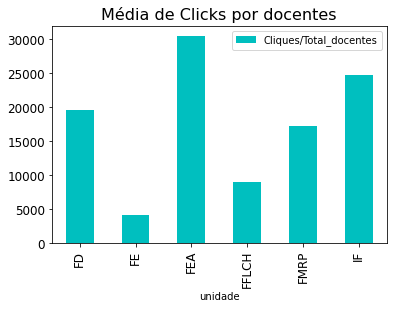

In [202]:
clicks_por_docentes.plot(kind='bar', color="c", x = 'unidade', y = 'Cliques/Total_docentes')
plt.title('Média de Clicks por docentes', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

Uma ideia após observar esse resultado foi analisar esse mesmo modelo de média, mas em relação ao número de ambientes criados por unidades e por ano. 

#**Cliques por ambientes criados**

In [281]:
acc= dados.groupby(by=['unidade','ano']).size()
ac= pd.DataFrame(acc)
cac['ambientes'] = ac.loc[['FD', 'FE', 'FEA', 'FFLCH', 'FMRP', 'IF']]
cac

0  ambientes
unidade ano                 
FD      2012   61         61
        2013  114        114
        2014  152        152
        2015  202        202
        2016  269        269
        2017  294        294
        2018  326        326
        2019  329        329
        2020  478        478
FE      2012   39         39
        2013   33         33
        2014   36         36
        2015   54         54
        2016   54         54
        2017   72         72
        2018   79         79
        2019   78         78
        2020  161        161
FEA     2012   16         16
        2013   27         27
        2014   40         40
        2015  103        103
        2016  515        515
        2017  483        483
        2018  464        464
        2019  426        426
        2020  489        489
FFLCH   2012  162        162
        2013  170        170
        2014  195        195
        2015  241        241
        2016  318        318
        2017  388        388
        2018  398        398
        2019  455        455
        2020  854        854
FMRP    2012    7          7
        2013   24         24
        2014  233        233
        2015  170        170
        2016  426        426
        2017  481        481
        2018  481        481
        2019  473        473
        2020  635        635
IF      2012   88         88
        2013   83         83
        2014  103        103
        2015  108        108
        2016  114        114
        2017  111        111
        2018  114        114
        2019  118        118
        2020  139        139

In [290]:
ambientes_criados = pd.DataFrame(cac.query('ano == 2020'))
ambientes_criados.reset_index(level=1, inplace=True)
ambientes_criados.reset_index(level=0, inplace=True)
ambientes_criados

,unidade,ano,0,ambientes
0,FD,2020,478,478
1,FE,2020,161,161
2,FEA,2020,489,489
3,FFLCH,2020,854,854
4,FMRP,2020,635,635
5,IF,2020,139,139


In [292]:
clicks_por_ambientes = pd.DataFrame()
clicks_por_ambientes['unidade'] = soma_views['unidade']
clicks_por_ambientes['Cliques/Total_ambientes'] = soma_views['soma_views'] / ambientes_criados['ambientes']
clicks_por_ambientes

,unidade,Cliques/Total_ambientes
0,FD,6026.330544
1,FE,2854.062112
2,FEA,10404.423313
3,FFLCH,4409.187354
4,FMRP,6484.662992
5,IF,20303.755396


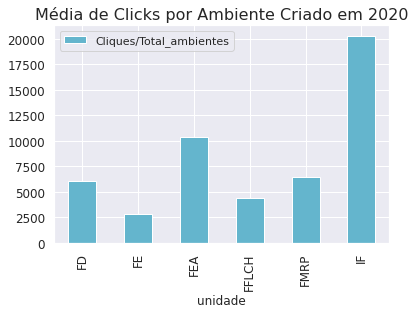

In [298]:
clicks_por_ambientes.plot(kind='bar', color="c", x = 'unidade', y = 'Cliques/Total_ambientes')
plt.title('Média de Clicks por Ambiente Criado em 2020', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()